In [39]:
import importlib
import gd_utils


module = importlib.reload(gd_utils)
show_image_by_url = module.show_image_by_url
show_image = module.show_image
move_image_to_directory = module.move_image_to_directory
getCrop = module.getCrop



In [7]:
# Установите зависимости при помощи poetry
!poetry install

Installing dependencies from lock file

No dependencies to install or update


In [8]:
from ultralytics import YOLO

In [9]:
# Берем модель Yolo и тренируем ее на coco
# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data="coco128.yaml", epochs=3)  # train the model
results = model.val()  # evaluate model performance on the validation set


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.Conv                  [128

In [10]:
from gd_utils import check_gpu
check_gpu()

Имя GPU: /physical_device:GPU:0


2023-02-25 16:05:36.909084: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-25 16:05:36.949014: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-25 16:05:36.949332: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [11]:
# посмотрим на результат модели и сделаем экспорт модели чтобы можно было пользоваться без тренировки
results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image
results

Ultralytics YOLOv8.0.45 🚀 Python-3.9.12 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 4080, 16076MiB)

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /home/gordondalos/Документы/Университет/ai-universitet/practica/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 27.1ms
Speed: 0.5ms preprocess, 27.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([6, 6])
 dtype: torch.float32
  + tensor([[4.70000e+01, 3.97000e+02, 2.47000e+02, 9.06000e+02, 8.88486e-01, 0.00000e+00],
         [2.20000e+01, 2.26000e+02, 8.01000e+02, 7.58000e+02, 8.82431e-01, 5.00000e+00],
         [6.70000e+02, 3.70000e+02, 8.10000e+02, 8.79000e+02, 8.68256e-01, 0.00000e+00],
         [2.19000e+02, 4.04000e+02, 3.44000e+02, 8.60000e+02, 8.22879e-01, 0.00000e+00],
         [0.00000e+00, 5.52000e+02, 6.50000e+01, 8.72000e+02, 4.73043e-01, 0.00000e+00],
         [0.00000e+00, 2.55000e+02, 3.20000e+01, 3.25000e+02, 3.31155e-01, 1.10000e+01]], device='cuda:0')]

### Это тензор размерности 3x6, состоящий из трех строк, каждая из которых содержит 6 чисел. Каждая строка соответствует описанию прямоугольной рамки (bounding box) для одного из обнаруженных объектов на изображении. Первые четыре числа в каждой строке - это координаты левого верхнего и правого нижнего углов ограничивающей рамки, пятый элемент - это вероятность (confidence) того, что внутри этой рамки действительно находится объект, а шестой элемент не используется. Координаты задаются в пикселях относительно верхнего левого угла изображения. Этот тензор находится на устройстве cuda:0 (если используется GPU)

In [12]:
model.export(format="onnx")

Ultralytics YOLOv8.0.45 🚀 Python-3.9.12 torch-1.13.1+cu117 CPU

PyTorch: starting from /home/gordondalos/Документы/Университет/ai-universitet/runs/detect/train/weights/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

ONNX: starting export with onnx 1.12.0...
ONNX: export success ✅ 0.7s, saved as /home/gordondalos/Документы/Университет/ai-universitet/runs/detect/train/weights/best.onnx (12.2 MB)

Export complete (0.9s)
Results saved to /home/gordondalos/Документы/Университет/ai-universitet/runs/detect/train/weights
Predict:         yolo predict task=detect model=/home/gordondalos/Документы/Университет/ai-universitet/runs/detect/train/weights/best.onnx imgsz=640 
Validate:        yolo val task=detect model=/home/gordondalos/Документы/Университет/ai-universitet/runs/detect/train/weights/best.onnx imgsz=640 data=/home/gordondalos/Документы/Университет/ai-universitet/.venv/lib/python3.9/site-packages/ultralytics/datasets/coco128.yaml 
Visualize:    

'/home/gordondalos/Документы/Университет/ai-universitet/runs/detect/train/weights/best.onnx'

In [13]:
results = model("./photo_2023-02-19_20-05-10.jpg")
results[0].boxes.boxes


image 1/1 /home/gordondalos/Документы/Университет/ai-universitet/practica/photo_2023-02-19_20-05-10.jpg: 640x640 4 persons, 30.6ms
Speed: 0.6ms preprocess, 30.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


tensor([[4.28000e+02, 4.70000e+02, 7.17000e+02, 9.94000e+02, 7.93526e-01, 0.00000e+00],
        [7.44000e+02, 4.56000e+02, 1.11400e+03, 8.88000e+02, 7.31472e-01, 0.00000e+00],
        [6.27000e+02, 3.58000e+02, 8.12000e+02, 7.48000e+02, 7.22774e-01, 0.00000e+00],
        [1.09200e+03, 5.00000e+02, 1.27700e+03, 8.59000e+02, 7.19261e-01, 0.00000e+00]], device='cuda:0')

In [14]:
results[0].boxes.boxes[0]

tensor([4.28000e+02, 4.70000e+02, 7.17000e+02, 9.94000e+02, 7.93526e-01, 0.00000e+00], device='cuda:0')

In [15]:
results[0].path

'/home/gordondalos/Документы/Университет/ai-universitet/practica/photo_2023-02-19_20-05-10.jpg'

In [16]:
results[0].names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [17]:
results[0].boxes

Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
type: <class 'torch.Tensor'>
shape: torch.Size([4, 6])
dtype: torch.float32
 + tensor([[4.28000e+02, 4.70000e+02, 7.17000e+02, 9.94000e+02, 7.93526e-01, 0.00000e+00],
        [7.44000e+02, 4.56000e+02, 1.11400e+03, 8.88000e+02, 7.31472e-01, 0.00000e+00],
        [6.27000e+02, 3.58000e+02, 8.12000e+02, 7.48000e+02, 7.22774e-01, 0.00000e+00],
        [1.09200e+03, 5.00000e+02, 1.27700e+03, 8.59000e+02, 7.19261e-01, 0.00000e+00]], device='cuda:0')

In [18]:
results[0].orig_shape

(1280, 1280)

In [19]:
print(results[0].masks)

None


In [21]:
for r in results:
    for c in r.boxes.cls:
        print(model.names[int(c)])

person
person
person
person


In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [23]:
from gd_utils import show_image

In [34]:
def result_and_show(url):
    results = model(url) 
    image = cv2.imread(url)
    color = (0, 255, 0)
    thickness = 2
    # извлечение координат боксов
    boxes = results[0].boxes.boxes

    # отображение боксов на изображении
    for box in boxes:
        x1, y1, x2, y2, conf, cls = box.tolist()
        if conf > 0.5 and cls == 0:
            cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), color, thickness)

    # отображение изображения с боксами
    # show_image(image)
    cv2.imwrite(f"{url}_bbox.jpg", image)

In [35]:
result_and_show("./photo_2023-02-19_20-05-10.jpg")
result_and_show("./4154.jpg")
result_and_show("./4113.jpg")
result_and_show("./5936.jpg")


image 1/1 /home/gordondalos/Документы/Университет/ai-universitet/practica/photo_2023-02-19_20-05-10.jpg: 640x640 4 persons, 40.8ms
Speed: 12.9ms preprocess, 40.8ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/gordondalos/Документы/Университет/ai-universitet/practica/4154.jpg: 640x640 3 persons, 46.1ms
Speed: 0.7ms preprocess, 46.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/gordondalos/Документы/Университет/ai-universitet/practica/4113.jpg: 640x640 1 person, 32.3ms
Speed: 0.5ms preprocess, 32.3ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/gordondalos/Документы/Университет/ai-universitet/practica/5936.jpg: 640x640 1 person, 27.9ms
Speed: 0.4ms preprocess, 27.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


In [36]:
show_image_by_url("./photo_2023-02-19_20-05-10.jpg")

In [40]:
source_folder = './corridors'
destination_folder = './data_image'
move_image_to_directory(source_folder, destination_folder)

In [85]:
import importlib
import gd_utils


module = importlib.reload(gd_utils)
show_image_by_url = module.show_image_by_url
show_image = module.show_image
move_image_to_directory = module.move_image_to_directory
getCrop = module.getCrop

In [87]:
# Кропнем все файлы

import os
from PIL import Image

path = './data_image'

for root, dirs, files in os.walk(path):

    for file in files:
        if file.endswith(('.jpg', '.png')):
            url = os.path.join(root, file)
            results = model(url)
            if results and results[0] and results[0].boxes:
                for boxes in results[0].boxes:
                    for bbox in boxes.boxes:
                        x, y, w, h, conf, cls =  map(int, bbox) # Фильтруем только людей
                        if model.names[int(cls)] == 'person': # Фильтруем только людей
                            getCrop(url, bbox.tolist())


image 1/1 /home/gordondalos/Документы/Университет/ai-universitet/practica/data_image/5806.jpg: 640x640 1 person, 1 orange, 1 refrigerator, 42.8ms
Speed: 14.0ms preprocess, 42.8ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/gordondalos/Документы/Университет/ai-universitet/practica/data_image/2585.jpg: 640x640 2 persons, 43.6ms
Speed: 1.1ms preprocess, 43.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/gordondalos/Документы/Университет/ai-universitet/practica/data_image/6609.jpg: 640x640 3 persons, 40.9ms
Speed: 0.7ms preprocess, 40.9ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/gordondalos/Документы/Университет/ai-universitet/practica/data_image/6296.jpg: 640x640 3 persons, 35.4ms
Speed: 0.5ms preprocess, 35.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/gordondalos/Документы/Университет/ai-universitet/practica/data_image/2007.jpg: 64

In [ ]:

from gd_utils import getCenterAndPosition


In [ ]:
import pandas as pd

df = pd.DataFrame(columns=['url','center_x', 'center_y', 'a', 'b', 'c', 'd'])


image 1/1 /content/5936.jpg: 640x640 1 person, 17.9ms
Speed: 0.9ms pre-process, 17.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


bbox [472.0, 283.0, 718.0, 739.0, 0.9172598123550415, 0.0]


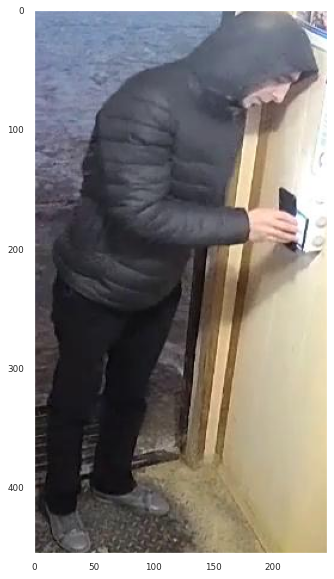


image 1/1 /content/5938.jpg: 640x640 1 person, 21.4ms
Speed: 0.6ms pre-process, 21.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


bbox [472.0, 282.0, 685.0, 735.0, 0.8920167088508606, 0.0]


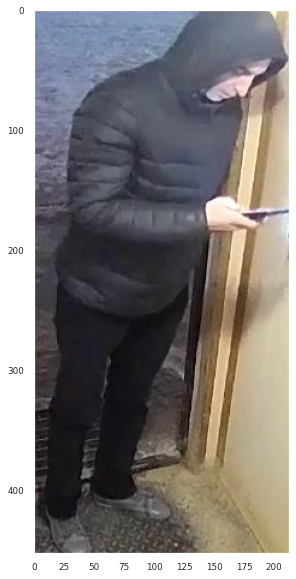


image 1/1 /content/5960.jpg: 640x640 2 persons, 17.9ms
Speed: 0.6ms pre-process, 17.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


bbox [438.0, 317.0, 715.0, 829.0, 0.8016175031661987, 0.0]


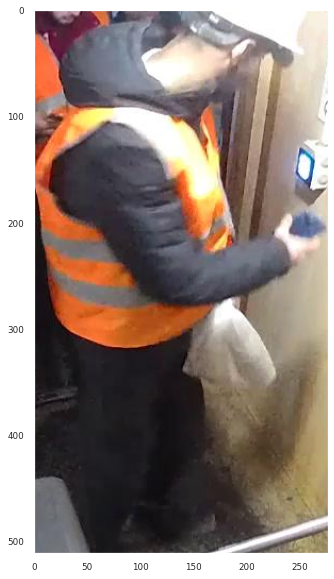


image 1/1 /content/5939.jpg: 640x640 1 person, 20.9ms
Speed: 3.4ms pre-process, 20.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


bbox [472.0, 282.0, 685.0, 727.0, 0.8978593945503235, 0.0]


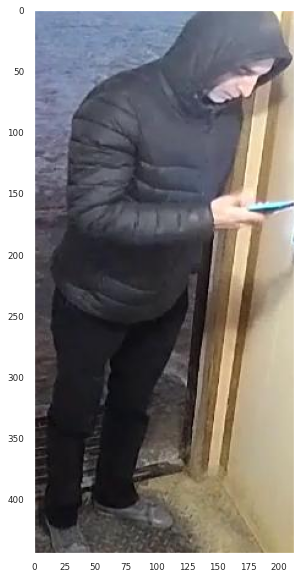


image 1/1 /content/5950.jpg: 640x640 1 person, 1 remote, 23.0ms
Speed: 0.7ms pre-process, 23.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


bbox [474.0, 334.0, 733.0, 836.0, 0.8924891352653503, 0.0]


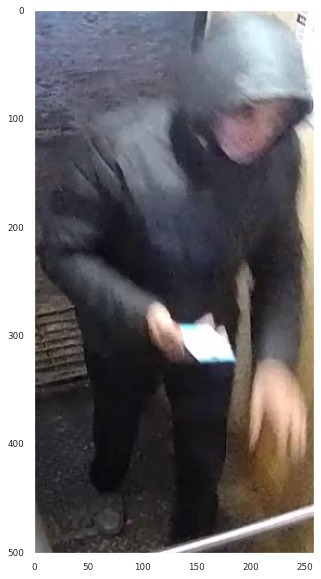

In [ ]:


url = "/content/5938.jpg"
results = model(url) 
bbox = results[0].boxes.boxes[0].tolist()
getCrop(url, bbox)

url = "/content/5960.jpg"
results = model(url) 
bbox = results[0].boxes.boxes[0].tolist()
getCrop(url, bbox)

url = "/content/5939.jpg"
results = model(url) 
bbox = results[0].boxes.boxes[0].tolist()
getCrop(url, bbox)

url = "/content/5950.jpg"
results = model(url) 
bbox = results[0].boxes.boxes[0].tolist()
getCrop(url, bbox)

In [ ]:
# Попробуем получить хеши изображений для того чтобы сравнить эти изображения между собой

from PIL import Image
import numpy as np

def average_hash(image_path, hash_size=8):
    # Открываем изображение и преобразуем его в оттенки серого
    image = Image.open(image_path).convert('L')
    # Изменяем размер изображения
    image = image.resize((hash_size, hash_size), Image.ANTIALIAS)
    # Преобразуем изображение в массив NumPy
    pixels = np.asarray(image)
    # Вычисляем среднее значение яркости пикселей
    avg = pixels.mean()
    # Превращаем массив пикселей в бинарный массив на основе среднего значения
    diff = pixels > avg
    # Преобразуем бинарный массив в целочисленный хеш
    bit_string = ''.join('1' if b else '0' for b in diff.flatten())

    return int(bit_string, 2)


def normalized_hamming_distance(hash1, hash2, hash_size=64):
    """
    Вычисление Normalized Hamming Distance между двумя хешами
    """
    hamming_distance = bin(hash1 ^ hash2).count('1')
    return hamming_distance / hash_size

def similarity_percentage(hash1, hash2, hash_size=64):
    """
    Вычисление процента совпадения хешей
    """
    normalized_distance = normalized_hamming_distance(hash1, hash2, hash_size)
    return (1 - normalized_distance) * 100

In [ ]:
# Получим Кеши и сравним два изображения
url2 = '/content/5938.jpgcrop.jpg'

url1 = '/content/5936.jpgcrop.jpg'
url3 = '/content/5960.jpgcrop.jpg'
url4 = '/content/5939.jpgcrop.jpg'
url5 = '/content/5950.jpgcrop.jpg'



hash1 = average_hash(url2, hash_size=80)
hash2 = average_hash(url1, hash_size=80)
hash3 = average_hash(url3, hash_size=80)
hash4 = average_hash(url4, hash_size=80)
hash5 = average_hash(url5, hash_size=80)

print('1 и 2', similarity_percentage(hash1, hash2, hash_size=6400))

print ('2 и 3', similarity_percentage(hash2, hash3, hash_size=6400))

print ('1 и 4', similarity_percentage(hash1, hash4, hash_size=6400))

print ('1 и 5', similarity_percentage(hash1, hash5, hash_size=6400))

1 и 2 89.125
2 и 3 66.81250000000001
1 и 4 96.140625
1 и 5 68.140625


In [30]:
from gd_utils import read_txt_files_from_directory_to_one_file

In [31]:
!rm my-data.csv

In [32]:
read_txt_files_from_directory_to_one_file('./data', './my-data.csv')

In [33]:
import pandas as pd

In [34]:
column_names = ["file_name", "obj", "btl", "btr", "bbr", "bbl"]
df = pd.read_csv('./my-data.csv', names=column_names)

In [35]:
print(df.head(20))

   file_name obj       btl       btr       bbr       bbl
0       1127   0  0.311414  0.509305  0.198511  0.378412
1       4372   0  0.270681  0.440998  0.096107  0.324818
2       4372   0  0.435523  0.441606  0.138686  0.379562
3       3407   0  0.533774  0.536344  0.220264  0.486784
4       7548   0  0.560204  0.486888  0.188265  0.429286
5       7548   1  0.612755  0.305153  0.078061  0.060714
6       7548   2  0.535204  0.441378  0.133163  0.177041
7       5923   0  0.400398  0.388446  0.111554  0.314741
8       3459   0  0.465605  0.428025  0.155414  0.412739
9       7029   0  0.460074  0.483415  0.180590  0.450860
10      7029   0  0.585381  0.493243  0.111794  0.426290
11      7029   0  0.855651  0.616708  0.256757  0.321867
12      7029   1  0.506143  0.296069  0.076167  0.066339
13      7029   2  0.429975  0.423833  0.100737  0.213759
14      7564   0  0.504300  0.493243  0.160934  0.436118
15      7564   2  0.504297  0.471744  0.153906  0.203931
16      4785   0  0.385749  0.3

In [37]:
df.shape

(11470, 6)

In [38]:
print(df.tail(20))

      file_name obj       btl       btr       bbr       bbl
11450       377   2  0.653321  0.634031  0.278479  0.288300
11451      1108   0  0.309553  0.511166  0.202233  0.377171
11452      5562   0  0.421348  0.408989  0.125843  0.377528
11453      5562   2  0.415730  0.338202  0.101124  0.164045
11454      2132   0  0.299031  0.610169  0.213075  0.358354
11455      1045   0  0.281250  0.477734  0.137500  0.347656
11456      5553   0  0.407865  0.401124  0.116854  0.370787
11457      5553   2  0.407865  0.344944  0.098876  0.164045
11458      4011   0  0.349219  0.436719  0.139063  0.437500
11459      5910   0  0.275896  0.432271  0.113546  0.350598
11460      5910   0  0.511952  0.552789  0.159363  0.484064
11461      4110   0  0.416328  0.425547  0.135937  0.400781
11462      4771   0  0.449017  0.461916  0.195332  0.425061
11463      1387   ﻿       NaN       NaN       NaN       NaN
11464      5294   0  0.455859  0.398828  0.111719  0.363281
11465      7129   0  0.892446  0.621639 

In [39]:
# Как видно у нас есть битые строки, удалим их
df = df.dropna()

In [40]:
#Посмотрим на статистики
print(df.describe())

                btl           btr           bbr           bbl
count  11211.000000  11211.000000  11211.000000  11211.000000
mean       0.490661      0.482714      0.171168      0.290013
std        0.165056      0.111268      0.074814      0.129400
min        0.035156      0.224415      0.000000      0.000000
25%        0.387760      0.412964      0.116594      0.178125
50%        0.470516      0.470703      0.153030      0.332031
75%        0.579678      0.576416      0.221116      0.395506
max        0.938800      0.760313      0.506373      0.545236


In [41]:
print(df.tail(20))

      file_name obj       btl       btr       bbr       bbl
11449       377   0  0.654374  0.585981  0.286195  0.390011
11450       377   2  0.653321  0.634031  0.278479  0.288300
11451      1108   0  0.309553  0.511166  0.202233  0.377171
11452      5562   0  0.421348  0.408989  0.125843  0.377528
11453      5562   2  0.415730  0.338202  0.101124  0.164045
11454      2132   0  0.299031  0.610169  0.213075  0.358354
11455      1045   0  0.281250  0.477734  0.137500  0.347656
11456      5553   0  0.407865  0.401124  0.116854  0.370787
11457      5553   2  0.407865  0.344944  0.098876  0.164045
11458      4011   0  0.349219  0.436719  0.139063  0.437500
11459      5910   0  0.275896  0.432271  0.113546  0.350598
11460      5910   0  0.511952  0.552789  0.159363  0.484064
11461      4110   0  0.416328  0.425547  0.135937  0.400781
11462      4771   0  0.449017  0.461916  0.195332  0.425061
11464      5294   0  0.455859  0.398828  0.111719  0.363281
11465      7129   0  0.892446  0.621639 

In [42]:
# Преобразуем категориальный признак в One-hot encoding
onehot_df = pd.get_dummies(df['obj'], prefix='obj')

# Объединяем исходный DataFrame и One-hot encoding DataFrame
df2 = pd.concat([df, onehot_df], axis=1)

# Удаляем исходный категориальный столбец
df2.drop('obj', axis=1, inplace=True)

In [43]:
print(df2.tail(5))
# obj_0 - человек
# obj_1 - каска
# obj_2 - жилетка

      file_name       btl       btr       bbr       bbl  obj_0  obj_1  obj_2
11465      7129  0.892446  0.621639  0.190781  0.308579      1      0      0
11466      7129  0.523047  0.578745  0.266325  0.407170      1      0      0
11467      7129  0.580026  0.454545  0.126761  0.358515      1      0      0
11468      7129  0.580026  0.437260  0.144686  0.121639      0      1      0
11469      7129  0.482714  0.668374  0.190781  0.227913      0      0      1


In [44]:
df2.to_csv('./clean_data.csv', index=False)